# Imports

In [5]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Loading Data

In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ["sepal-length", "sepal-width", "petal-length", "petal-width", "class"]
dataset = pd.read_csv(url, names=names)

# First Exploration

In [10]:
dataset.shape

(150, 5)

In [11]:
dataset.head(20)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Visualization

In [14]:
%matplotlib inline

## Boxplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b09a5486ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b09a4d22ac8>]], dtype=object)

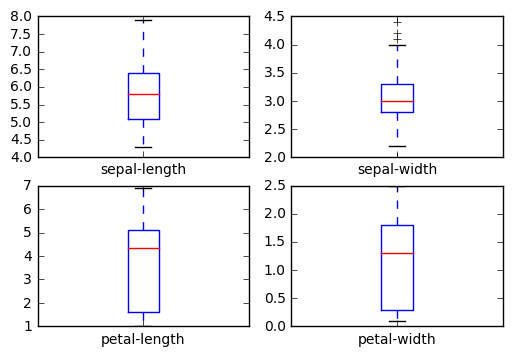

In [15]:
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)

## Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b09a5881be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b09a5984668>]], dtype=object)

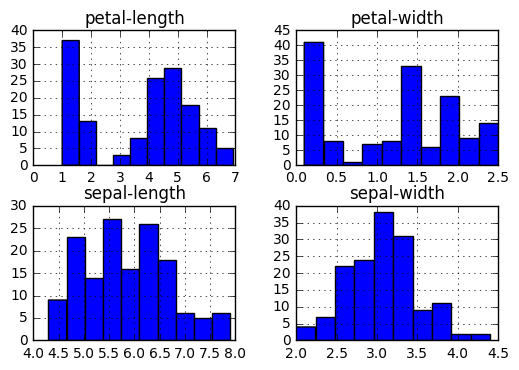

In [18]:
dataset.hist()

## Scattermatrix

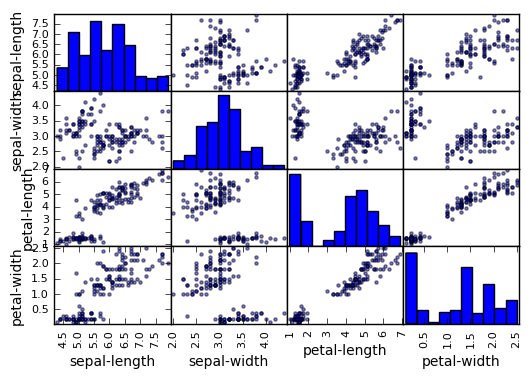

In [20]:
_ = scatter_matrix(dataset)  # assigning to _ avoids that all subplot objects are printed

# Algorithm Evaluation

## Create Validation set

In [28]:
array = dataset.values
X = array[:, 0:4]
Y = array[:, 4]
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size,
                                                                                random_state=seed)

## Define Cross-Validation metrics

$\text{Accuracy} = \frac{TP + TN}{\text{Number of instances}}$

In [29]:
seed = 7
scoring = "accuracy"

## Building Models

In [31]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("CART", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

results = []
names = []
for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=10, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.967308 (0.040078)
LDA: 0.974883 (0.038494)
KNN: 0.981667 (0.036856)
CART: 0.974883 (0.038494)
NB: 0.966550 (0.041087)
SVM: 0.991667 (0.025000)


## Algorithm Comparison

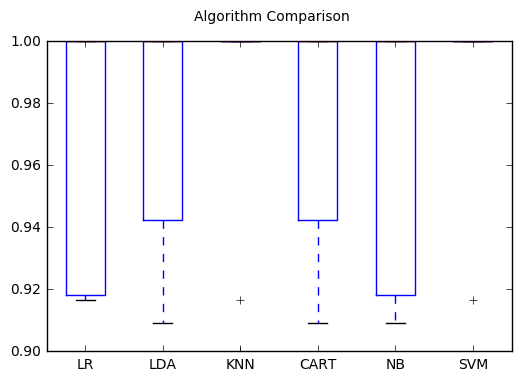

In [32]:
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

## Making Predictions

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

In [35]:
print(accuracy_score(Y_validation, predictions))

0.9


In [36]:
print(confusion_matrix(Y_validation, predictions))

[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


In [37]:
print(classification_report(Y_validation, predictions))

             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

